In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load your uploaded CSV
df = pd.read_csv("dindigul_tomato_procurement_2023.csv")

# Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Farm_Location', 'Tomato_Variety', 'Pest_Incidence']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

# Define features (X) and target (y)
features = ['Farm_Size_Hectares', 'Seed_Cost', 'Labor_Cost', 'Fertilizer_Cost',
            'Irrigation_Cost', 'Yield_Kg', 'Avg_Temp_C', 'Rainfall_mm',
            'Pest_Incidence', 'Month', 'Day', 'Festival_Impact'] + categorical_cols
X = df[features]
y = df['Fair_Price_Per_Kg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: ₹{mean_absolute_error(y_test, y_pred):.2f}/kg")

# Feature Importance (for insights)
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:\n", importances)

Mean Absolute Error: ₹2.54/kg

Feature Importance:
 Irrigation_Cost       0.118480
Fertilizer_Cost       0.116975
Yield_Kg              0.116131
Seed_Cost             0.113868
Labor_Cost            0.113167
Avg_Temp_C            0.080426
Rainfall_mm           0.078741
Festival_Impact       0.068027
Day                   0.062075
Tomato_Variety        0.037047
Farm_Location         0.036562
Month                 0.035083
Pest_Incidence        0.011309
Pest_Incidence        0.011117
Farm_Size_Hectares    0.000991
dtype: float64


In [ ]:
# Predict prices for the entire dataset
df['Predicted_Price_Per_Kg'] = model.predict(X)

# Ensure fair price (at least 30% over cost)
df['Final_Fair_Price'] = np.maximum(
    df['Predicted_Price_Per_Kg'],
    df['Cost_Per_Kg'] * 1.3  # 30% profit margin
)

# Save results
df.to_csv("dindigul_tomato_predictions.csv", index=False)
print("Predictions saved!")

Predictions saved!


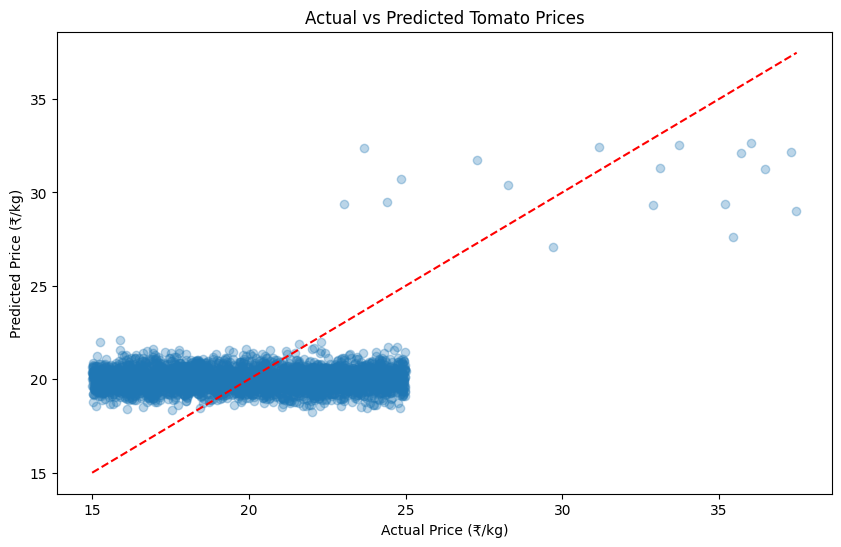


Top 10 Farmers by Fair Price:
     Farmer_ID  Farm_Location  Final_Fair_Price
739  FARM_040              4         35.695030
681  FARM_032              2         35.582759
728  FARM_029              2         35.369273
703  FARM_004              4         35.048698
747  FARM_048              1         34.970872
686  FARM_037              1         34.885169
709  FARM_010              0         34.661198
659  FARM_010              0         34.634990
675  FARM_026              2         34.558637
740  FARM_041              4         34.491365


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price (₹/kg)")
plt.ylabel("Predicted Price (₹/kg)")
plt.title("Actual vs Predicted Tomato Prices")
plt.show()

# Top 10 farmers by profitability
top_farmers = df.sort_values(by='Final_Fair_Price', ascending=False).head(10)
print("\nTop 10 Farmers by Fair Price:\n", top_farmers[['Farmer_ID', 'Farm_Location', 'Final_Fair_Price']])